# подготовка данных

In [1]:
import pandas
import numpy as np

In [2]:
# Загружаем данные
train = pandas.read_csv('features.csv', index_col='match_id')
test = pandas.read_csv('features_test.csv', index_col='match_id')

In [3]:
# Удаляем признаки, связанные с итогами матча
train.drop(['duration', 
         'tower_status_radiant', 
         'tower_status_dire', 
         'barracks_status_radiant', 
         'barracks_status_dire'
        ], axis=1, inplace=True)

In [4]:
# И разделяем датасет на признаки и целевую переменную
X = train
y = train['radiant_win'].to_frame()
del train['radiant_win']

In [5]:
# мусор на входе= мусор на выходе - очистка данных

In [6]:
# Заменяем пропуски на 0
def clean(X):
    return X.fillna(0)

# Сохраняем данные

In [7]:
def save_clean_data(cleaner, X_train, y_train, X_test, name='simple'):
    y_train.to_csv('y_train.csv')
    cleaner(X_train).to_csv('X_train.csv')
    cleaner(X_test).to_csv('X_test.csv')

In [8]:
save_clean_data(clean, X, y, test)

In [9]:
def get_clean_data(cleaner_name='simple'):
    X_train = pandas.read_csv('X_train.csv', index_col='match_id')
    y_train = pandas.read_csv('y_train.csv', index_col='match_id')
    X_test = pandas.read_csv('X_test.csv', index_col='match_id')
    return X_train, y_train['radiant_win'], X_test

In [10]:
X, y, X_test = get_clean_data()

In [11]:
X

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time
match_id,,,,,,,,,,,,,,,,,,,,,
0,1430198770,7,11,5,2098,1489,20,0,0,7,...,0,35.0,103.0,-84.0,221.0,3,4,2,2,-52.0
1,1430220345,0,42,4,1188,1033,9,0,1,12,...,0,-20.0,149.0,-84.0,195.0,5,4,3,1,-5.0
2,1430227081,7,33,4,1319,1270,22,0,0,12,...,1,-39.0,45.0,-77.0,221.0,3,4,3,1,13.0
3,1430263531,1,29,4,1779,1056,14,0,0,5,...,0,-30.0,124.0,-80.0,184.0,0,4,2,0,27.0
4,1430282290,7,13,4,1431,1090,8,1,0,8,...,0,46.0,182.0,-80.0,225.0,6,3,3,0,-16.0
5,1430284186,1,11,5,1961,1461,19,0,1,6,...,1,-27.0,2.0,-86.0,212.0,4,4,4,0,-43.0
8,1430293701,1,8,3,967,1136,7,1,0,8,...,2,-35.0,6.0,-86.0,182.0,3,6,3,0,10.0
9,1430299335,7,35,5,2117,1252,16,0,0,6,...,1,26.0,119.0,-61.0,0.0,2,3,4,0,-15.0
11,1430308974,1,17,5,1527,906,10,0,1,7,...,1,9.0,0.0,-84.0,226.0,1,3,4,0,26.0


## Подход 1: градиентный бустинг "в лоб"

In [12]:
import pandas
import numpy as np
import time
import datetime
import matplotlib.pyplot as plt
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

%matplotlib inline

d:\Python\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
X, y, X_test
kf = KFold(y.size, n_folds=5, shuffle=True, random_state=42)

# Подбираем оптимальное число деревьев

In [14]:
scores = []
nums = [10, 20, 30, 50, 100, 250]
for n in nums:
    print '#', str(n)
    model = GradientBoostingClassifier(n_estimators=n, random_state=42)
    start_time = datetime.datetime.now()
    model_scores = cross_val_score(model, X, y, cv=kf, scoring='roc_auc', n_jobs=-1)
    print 'Time elapsed:', datetime.datetime.now() - start_time
    print model_scores
    scores.append(np.mean(model_scores))

# 10
Time elapsed: 0:00:22.522000
[ 0.66383799  0.66635457  0.66360048  0.66529818  0.66516222]
# 20
Time elapsed: 0:00:36.322000
[ 0.68083889  0.68272733  0.67969876  0.6834932   0.6855512 ]
# 30
Time elapsed: 0:00:54.733000
[ 0.68892093  0.68934663  0.68712298  0.69180598  0.69283583]
# 50
Time elapsed: 0:01:10.519000
[ 0.69627399  0.69747879  0.69470891  0.69921915  0.69979097]
# 100
Time elapsed: 0:02:14.196000
[ 0.70515496  0.706077    0.70429951  0.7074682   0.70811523]
# 250
Time elapsed: 0:05:19.346000
[ 0.71547078  0.71462661  0.71535522  0.71731507  0.71680663]


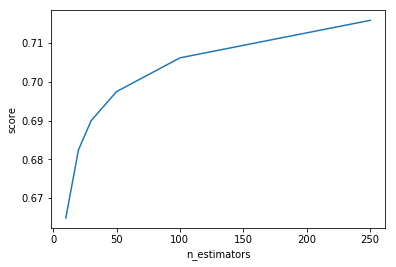

In [15]:
plt.plot(nums, scores)
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.show()

In [16]:
#Кросс-валидация для градиентного бустинга с 30 деревьями заняла 0:00:54.
#Показатель метрики качества AUC-ROC в таком случае равен 0.69.

#Увеличение количества деревьев также увеличивает показатель метрики AUC-ROC, приближая его к 0.72.
#Для достижения большего качества имеет смысл использовать более 30 деревьев.
#Для ускорения обучения можно использовать не всю выборку, а некоторое ее подмножество — например, половину объектов. 
#Также можно уменьшить глубину деревьев (max_depth).

## Подход 2: логистическая регрессия

In [17]:
# Загружаем данные (по новой)
train = pandas.read_csv('./data/features.csv', index_col='match_id')
test = pandas.read_csv('./data/features_test.csv', index_col='match_id')

# Удаляем признаки, связанные с итогами матча
train.drop(['duration', 
         'tower_status_radiant', 
         'tower_status_dire', 
         'barracks_status_radiant', 
         'barracks_status_dire'
        ], axis=1, inplace=True)

# И разделяем датасет на признаки и целевую переменную
X = train
y = train['radiant_win'].to_frame()
del train['radiant_win']

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [19]:
X=clean(X)
scaler = StandardScaler()
X = scaler.fit_transform(X)

kf = KFold(y.size, n_folds=5, shuffle=True, random_state=42)

# Подбираем оптимальный параметр регуляризации (C)

In [20]:
def plot_C_scores(C_pow_range, scores):
    plt.plot(C_pow_range, scores)
    plt.xlabel('log(C)')
    plt.ylabel('score')
    plt.show()

def test_model_C(X, y, C):
    print 'C =', str(C)
    model = LogisticRegression(C=C, random_state=42, n_jobs=-1)
    return cross_val_score(model, X, y, cv=kf, scoring='roc_auc', n_jobs=-1)
    
def test_model(X, y):
    scores = []
    C_pow_range = range(-5, 6)
    C_range = [10.0 ** i for i in C_pow_range]
    for C in C_range:
        start_time = datetime.datetime.now()
        model_scores = test_model_C(X, y, C)
        print model_scores
        print 'Time elapsed:', datetime.datetime.now() - start_time       
        scores.append(np.mean(model_scores))

    plot_C_scores(C_pow_range, scores)
    
    max_score = max(scores)
    max_score_index = scores.index(max_score)
    return C_range[max_score_index], max_score

C = 1e-05
[ 0.6931532   0.69481539  0.69571379  0.69513159  0.69699445]
Time elapsed: 0:00:07.973000
C = 0.0001
[ 0.70956686  0.71039474  0.71170336  0.71176082  0.71336295]
Time elapsed: 0:00:08.505000
C = 0.001
[ 0.71449541  0.71577214  0.71625974  0.71697301  0.71831738]
Time elapsed: 0:00:12.928000
C = 0.01
[ 0.71464598  0.71617915  0.71624749  0.71735041  0.71832832]
Time elapsed: 0:00:14.606000
C = 0.1
[ 0.71462192  0.71617479  0.71619187  0.71737596  0.7182712 ]
Time elapsed: 0:00:14.858000
C = 1.0
[ 0.71461815  0.71617185  0.71618338  0.7173762   0.71826341]
Time elapsed: 0:00:15.474000
C = 10.0
[ 0.71461695  0.71617179  0.71618281  0.71737669  0.7182632 ]
Time elapsed: 0:00:14.420000
C = 100.0
[ 0.71461692  0.71617206  0.71618249  0.71737655  0.71826345]
Time elapsed: 0:00:15.332000
C = 1000.0
[ 0.71461693  0.71617214  0.7161825   0.71737659  0.71826346]
Time elapsed: 0:00:14.912000
C = 10000.0
[ 0.71461693  0.71617215  0.71618251  0.7173766   0.71826345]
Time elapsed: 0:00:15

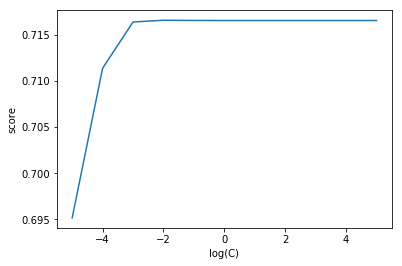

In [21]:
C, score = test_model(X, y)

In [22]:
print C
print score

0.01
0.716550269726


In [23]:
#Наилучшее значение показателя AUC-ROC достигается при C = 0.01 и равно 0.72.
#Это сравнимо с градиентным бустингом по 250 деревьям, при этом логистическая регрессия работает заметно быстрее 14 секунд вместо
#5 минут.

2) Удаление категориальных признаков

In [24]:
# Загружаем данные (по новой)
train = pandas.read_csv('./data/features.csv', index_col='match_id')
test = pandas.read_csv('./data/features_test.csv', index_col='match_id')

# Удаляем признаки, связанные с итогами матча
train.drop(['duration', 
         'tower_status_radiant', 
         'tower_status_dire', 
         'barracks_status_radiant', 
         'barracks_status_dire'
        ], axis=1, inplace=True)

# И разделяем датасет на признаки и целевую переменную
X = train
y = train['radiant_win'].to_frame()
del train['radiant_win']

In [25]:
# В данных присутствует 11 категориальных признаков, удаляем их
def clean_category(X):
    X = clean(X)
    del X['lobby_type']
    for n in xrange(1, 6):
        del X['r{}_hero'.format(n)]
        del X['d{}_hero'.format(n)]

    return X

In [26]:
X=clean_category(X)
scaler = StandardScaler()
X = scaler.fit_transform(X)

kf = KFold(y.size, n_folds=5, shuffle=True, random_state=42)

C = 1e-05
[ 0.69301063  0.69476367  0.69562225  0.69507488  0.69702952]
Time elapsed: 0:00:07.769000
C = 0.0001
[ 0.70936502  0.71042199  0.71168956  0.71168269  0.71353648]
Time elapsed: 0:00:08.320000
C = 0.001
[ 0.71434804  0.71581532  0.71629769  0.7168852   0.71853275]
Time elapsed: 0:00:12.493000
C = 0.01
[ 0.71450425  0.71622052  0.71627999  0.71725088  0.71854131]
Time elapsed: 0:00:13.478000
C = 0.1
[ 0.71448206  0.71620992  0.71622569  0.71726917  0.71848436]
Time elapsed: 0:00:14.681000
C = 1.0
[ 0.71447768  0.71620627  0.7162209   0.71727019  0.71847678]
Time elapsed: 0:00:14.414000
C = 10.0
[ 0.71447669  0.71620645  0.71621968  0.71727123  0.71847581]
Time elapsed: 0:00:14.293000
C = 100.0
[ 0.7144767   0.71620624  0.71621963  0.71727119  0.71847569]
Time elapsed: 0:00:14.299000
C = 1000.0
[ 0.71447667  0.71620624  0.71621965  0.71727119  0.71847569]
Time elapsed: 0:00:13.868000
C = 10000.0
[ 0.71447668  0.71620627  0.71621961  0.71727117  0.71847569]
Time elapsed: 0:00:14

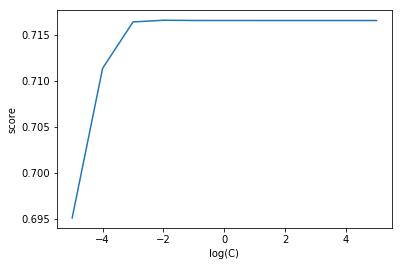

In [27]:
C, score = test_model(X, y)

In [28]:
print C
print score

0.01
0.716559388563


In [29]:
#Удаление категориальных признаков практически не повлияло на качество предсказания (изменения только в 5 знаке после запятой). 
#Наилучшее значение показателя AUC-ROC так же достигается при C = 0.01 и равно 0.71.
#Получается, что в предыдущей модели эти признаки никак не влияли на результат предсказания.

## "Мешок слов" для кодирования информации о героях.

In [60]:
# Загружаем данные (по новой)
train = pandas.read_csv('./data/features.csv', index_col='match_id')
test = pandas.read_csv('./data/features_test.csv', index_col='match_id')

# Удаляем признаки, связанные с итогами матча
train.drop(['duration', 
         'tower_status_radiant', 
         'tower_status_dire', 
         'barracks_status_radiant', 
         'barracks_status_dire'
        ], axis=1, inplace=True)

# И разделяем датасет на признаки и целевую переменную
X = train
y = train['radiant_win'].to_frame()
del train['radiant_win']

In [61]:
X=clean(X)
scaler = StandardScaler()

In [62]:
X

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time
match_id,,,,,,,,,,,,,,,,,,,,,
0,1430198770,7,11,5,2098,1489,20,0,0,7,...,0,35.0,103.0,-84.0,221.0,3,4,2,2,-52.0
1,1430220345,0,42,4,1188,1033,9,0,1,12,...,0,-20.0,149.0,-84.0,195.0,5,4,3,1,-5.0
2,1430227081,7,33,4,1319,1270,22,0,0,12,...,1,-39.0,45.0,-77.0,221.0,3,4,3,1,13.0
3,1430263531,1,29,4,1779,1056,14,0,0,5,...,0,-30.0,124.0,-80.0,184.0,0,4,2,0,27.0
4,1430282290,7,13,4,1431,1090,8,1,0,8,...,0,46.0,182.0,-80.0,225.0,6,3,3,0,-16.0
5,1430284186,1,11,5,1961,1461,19,0,1,6,...,1,-27.0,2.0,-86.0,212.0,4,4,4,0,-43.0
8,1430293701,1,8,3,967,1136,7,1,0,8,...,2,-35.0,6.0,-86.0,182.0,3,6,3,0,10.0
9,1430299335,7,35,5,2117,1252,16,0,0,6,...,1,26.0,119.0,-61.0,0.0,2,3,4,0,-15.0
11,1430308974,1,17,5,1527,906,10,0,1,7,...,1,9.0,0.0,-84.0,226.0,1,3,4,0,26.0


In [53]:
#число героев в игре
heroes = pandas.read_csv('./data/dictionaries/heroes.csv')
len(heroes)

112

In [54]:
# Код для формирования "мешка слов" по героям
# N — количество различных героев в выборке
N=len(heroes)
X_pick = np.zeros((X.shape[0], N))

for i, match_id in enumerate(X.index):
    for p in xrange(5):
        X_pick[i, X.ix[match_id, 'r%d_hero' % (p+1)]-1] = 1
        X_pick[i, X.ix[match_id, 'd%d_hero' % (p+1)]-1] = -1

d:\Python\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


In [63]:
X_pick

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0., -1.]])

In [68]:
X = scaler.fit_transform(X)
X

array([[-2.54436416,  1.54068827, -1.24422828, ..., -0.55115386,
         1.84600409, -1.12149424],
       [-2.54045236, -0.92779756, -0.29225805, ...,  0.67817009,
         0.43778816,  0.04394713],
       [-2.53923104,  1.54068827, -0.5686365 , ...,  0.67817009,
         0.43778816,  0.49028637],
       ..., 
       [ 1.09874571, -0.57515673,  1.42743012, ...,  0.67817009,
         0.43778816, -0.20401912],
       [ 1.09895204, -0.57515673,  1.48884755, ...,  0.67817009,
         0.43778816, -0.87352799],
       [ 1.1026479 ,  1.54068827, -0.04658831, ..., -0.55115386,
        -0.97042777, -0.79913812]])

In [79]:
X_pick.shape

(97230L, 112L)

In [80]:
X.shape

(97230L, 102L)

In [84]:
X1=np.hstack((X,X_pick))

In [85]:
X1

array([[-2.54436416,  1.54068827, -1.24422828, ...,  0.        ,
         0.        ,  0.        ],
       [-2.54045236, -0.92779756, -0.29225805, ...,  0.        ,
         0.        ,  0.        ],
       [-2.53923104,  1.54068827, -0.5686365 , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 1.09874571, -0.57515673,  1.42743012, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.09895204, -0.57515673,  1.48884755, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.1026479 ,  1.54068827, -0.04658831, ...,  0.        ,
         0.        , -1.        ]])

C = 1e-05
[ 0.69733286  0.69885623  0.69963632  0.69936261  0.70108801]
Time elapsed: 0:00:12.996000
C = 0.0001
[ 0.72369908  0.72410239  0.72462351  0.7259918   0.72687528]
Time elapsed: 0:00:16.892000
C = 0.001
[ 0.74472648  0.74668589  0.74398597  0.74886378  0.74736825]
Time elapsed: 0:00:18.551000
C = 0.01
[ 0.74947928  0.75274162  0.74909634  0.75544119  0.75171193]
Time elapsed: 0:00:28.479000
C = 0.1
[ 0.7494218   0.75310971  0.74936908  0.75602988  0.75156882]
Time elapsed: 0:00:30.299000
C = 1.0
[ 0.74935336  0.75312857  0.74936769  0.75606867  0.75149828]
Time elapsed: 0:00:34.741000
C = 10.0
[ 0.74934465  0.75312771  0.7493675   0.75607295  0.7514903 ]
Time elapsed: 0:00:34.343000
C = 100.0
[ 0.74934387  0.7531283   0.74936768  0.75607323  0.75148921]
Time elapsed: 0:00:33.902000
C = 1000.0
[ 0.74934292  0.75312798  0.74936742  0.7560733   0.75149006]
Time elapsed: 0:00:33.243000
C = 10000.0
[ 0.7493429   0.7531282   0.74936761  0.75607302  0.75148962]
Time elapsed: 0:00:33

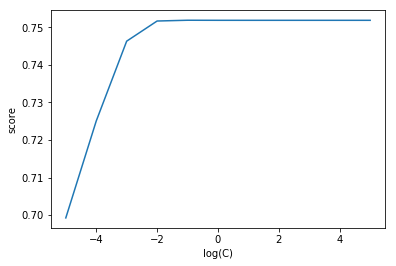

In [86]:
C, score = test_model(X1, y)

In [87]:
print C
print score

0.1
0.751899860207


In [ ]:
#После добавления "мешка слов" по героям качество заметно улучшилось. 
#Наилучшее значение показателя AUC-ROC достигается при C = 0.1 и равно 0.75.
#Это объясняется тем, что вместо отсутствия данных о героях или случайного шума из id
#мы имеем осмысленную разреженную матрицу для построения предсказания.